In [1]:
import pandas as pd
import matplotlib.pyplot as plt

`prediction_unit_id`  is a unique identifier for the `county`, `is_business`, and `product_type` combination. New prediction units can appear or dissappear in the test set.

In [2]:
df_train = pd.read_csv('../../predict-energy-behavior-of-prosumers/train.csv')
df_train["datetime"] = pd.to_datetime(df_train["datetime"])

df_train["prediction_unit_id"].value_counts()

prediction_unit_id
0     30624
46    30624
32    30624
33    30624
1     30624
      ...  
47    24000
67    23280
26    19968
41    12144
68     3312
Name: count, Length: 69, dtype: int64

In [3]:
df_train.columns

Index(['county', 'is_business', 'product_type', 'target', 'is_consumption',
       'datetime', 'data_block_id', 'row_id', 'prediction_unit_id'],
      dtype='object')

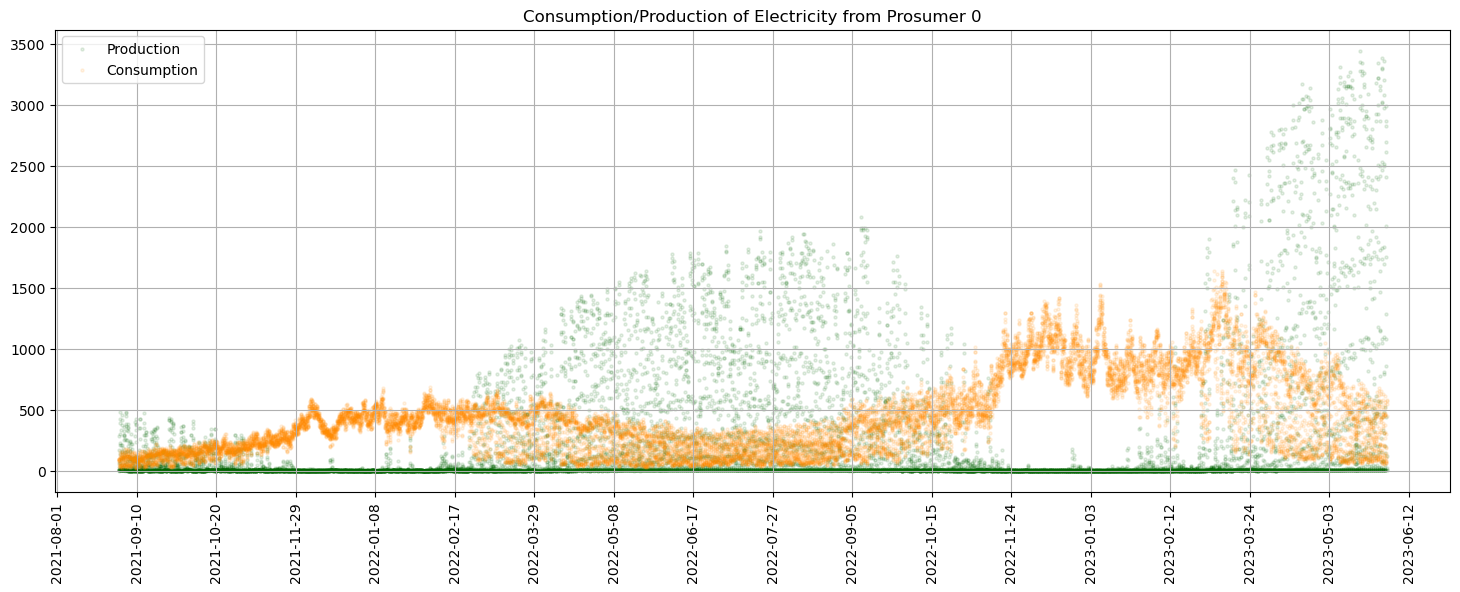

In [4]:
prod_unit_df = df_train[df_train["prediction_unit_id"]==0]

fig, ax = plt.subplots(figsize=(18,6))
point_size = 5
ax.scatter(
    prod_unit_df[prod_unit_df.is_consumption==0].datetime, 
    prod_unit_df[prod_unit_df.is_consumption==0].target,
    label='Production', 
    alpha=0.1, 
    s=point_size,
    color="darkgreen"
)
ax.scatter(
    prod_unit_df[prod_unit_df.is_consumption==1].datetime, 
    prod_unit_df[prod_unit_df.is_consumption==1].target,
    label='Consumption', 
    alpha=0.1, 
    s=point_size,
    color="darkorange"
)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
ax.legend(loc='upper left')
plt.xticks(rotation=90)
plt.title('Consumption/Production of Electricity from Prosumer 0')
plt.grid()
plt.show()